In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3    ## SQL Interface
import pickle     ## Used to save your data - Converts objects to byte stream and vice versa

from sklearn.feature_extraction.text import CountVectorizer  ## BOW Model
from sklearn.feature_extraction.text import TfidfVectorizer  ## TFIDF Model

from sklearn.manifold import TSNE    ## To visualize high dimensional data

## Modules to perform Text Preprocessing


In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

In [23]:
conn = sqlite3.connect('mail.sqlite')

df= pd.read_sql_query("""SELECT * FROM mail""", conn)

df.head()

,level_0,index,mail,score,Cleanedmail
0,0,0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,1,1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,2,2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,3,3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,4,4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [24]:
df.drop(['index'],axis=1,inplace=True)

In [25]:
df.head()

,level_0,mail,score,Cleanedmail
0,0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [26]:
df.drop(['level_0'],axis=1,inplace=True)

In [27]:
df.head()

,mail,score,Cleanedmail
0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [28]:
df.shape

(962, 3)

## Shuffling

In [29]:
from sklearn.utils import shuffle

In [30]:
df = shuffle(df, random_state=69)
df.head()

,mail,score,Cleanedmail
371,workshop computationally-intensive methods qua...,0,workshop method quantit linguist human advanc ...
624,""" show money ! "" . . . . . . . . . . . . probl...",1,show money problem share uniqu opportun start ...
351,"shigeru kiritanus , hajime hirose hiroya fujis...",0,shigeru kiritanus hajim hiros hiroya fujisakus...
305,book list below linguist office available revi...,0,book list linguist offic avail review interest...
111,computational ling bengt sigurd ( ed ) compute...,0,comput ling bengt sigurd computer grammar anal...


## Using BOW vector

In [31]:
bow_vect=CountVectorizer(binary=False)
bow = bow_vect.fit_transform(df['Cleanedmail'].values)

In [32]:
X=bow
y=df["score"].values

## Training and Testing

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False)


The optimal value of alpha is0.1


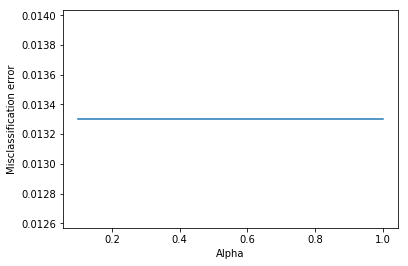

In [35]:
alpha= np.linspace(0.1,1,10)
cv_scores=[]

for a in alpha:
    clf=MultinomialNB(alpha=a)
    scores=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

MSE=[1 - x for x in cv_scores]

optimal_alpha= alpha[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is{}'.format(optimal_alpha))

plt.plot(alpha,MSE)
plt.xlabel('Alpha')
plt.ylabel('Misclassification error')
plt.show()
    

## Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix


In [37]:
clf=MultinomialNB(alpha=optimal_alpha)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
confusion_matrix(y_test,y_pred).T

98.2698961938


array([[132,   2],
       [  3, 152]], dtype=int64)

In [38]:
idx=(-clf.feature_log_prob_).argsort()[:2,:50]
print("top 50 words in SPAM")
for i in idx[0]:
    print(bow_vect.get_feature_names()[i])
print("\n******")
print("top 50 words in positive HAM")
for i in idx[1]:
    print(bow_vect.get_feature_names()[i])

top 50 words in SPAM
languag
univers
linguist
paper
confer
inform
one
english
edu
research
present
includ
address
pleas
form
discuss
interest
follow
http
work
theori
send
workshop
analysi
fax
abstract
submiss
comput
speech
relat
system
word
discours
name
registr
studi
speaker
refer
student
issu
develop
list
process
session
particip
scienc
call
www
mean
depart

******
top 50 words in positive HAM
order
report
address
mail
email
program
send
list
receiv
money
name
free
busi
one
work
inform
internet
day
market
com
pleas
check
http
letter
call
want
start
follow
remov
product
week
advertis
servic
need
site
includ
million
everi
bulk
offer
number
read
softwar
web
credit
even
first
mani
sell
best
